# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [2]:
# cities = ["Denver", "Tampa", "Seattle" ]

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


#Lists for holding required items
city_name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []
country = []
date = []


for city in cities:
    weather_data = requests.get(query_url + city).json()
    
    try:
        
        city_name.append(weather_data['name'])
        lat.append(weather_data['coord']['lat'])
        lng.append(weather_data['coord']['lon'])
        temp.append(weather_data['main']['temp'])
        humid.append(weather_data['main']['humidity'])
        clouds.append(weather_data['clouds']['all'])
        wind.append(weather_data['wind']['speed'])
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
        
        print(f"process {city}")
            
    except KeyError:
       print('Missing field')
        


process puerto colombia
process yumen
process anchorage
process nikolskoye
process cabo san lucas
process vaini
Missing field
process panzhihua
Missing field
Missing field
process dubbo
process lebu
process mataura
process dikson
process barrow
process alofi
process zyryanka
process castro
process sao filipe
process salalah
process deputatskiy
process arraial do cabo
process cidreira
process nhulunbuy
process saldanha
process busselton
process vostok
process bethel
process hambantota
process baruun-urt
Missing field
process rikitea
process lokachi
Missing field
process hermanus
process faanui
process jamestown
process carnarvon
process sabha
process punta arenas
process cape town
Missing field
process seoul
Missing field
process albany
process mount isa
process chokurdakh
process michigan city
process ushuaia
process sorkjosen
process tumen
Missing field
process victoria
process puerto ayora
process saint-philippe
process vanimo
process seydi
process inirida
process tomatlan
process ko

process lakewood
process norman wells
process kieta
process gawler
process arona
Missing field
process la asuncion
process morro bay
process namibe
process qasigiannguit
process tura
process crestview
process nouakchott
process atar
process flin flon
process shyryayeve
process del rio
process luderitz
process pinar del rio
Missing field
process sungairaya
Missing field
process mastic beach
process lingao
process aquitania
process praia da vitoria
process kaya
process fairlie
process bilibino
process synya
process malumfashi
process mugango
process tymovskoye
Missing field
process bandar-e lengeh
process rundu
process yidu
Missing field
process bakaly
process lons-le-saunier
process jaisalmer
process olinda
process samarai
Missing field
process suez
process acarau
process lashio
process katobu
process lewistown
process cuiluan
process villefranche-sur-saone
process severo-yeniseyskiy
process miles city
process san jose
process griffith
process kuandian
process ca mau
process catamarca
p

In [4]:
len(temp) 

545

In [5]:
len(city_name)

545

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create a dataframe s
city_data_df = pd.DataFrame({'City': city_name,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Humidity': humid,
                            'Cloudiness': clouds,
                            'Wind Speed': wind,
                            'Country': country,
                            'Date':date})

city_data_df.head()



,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Colombia,10.9878,-74.9547,87.66,74,99,20.36,CO,1620848237
1,Yumen,40.2833,97.2000,58.86,25,62,10.47,CN,1620848237
2,Anchorage,61.2181,-149.9003,48.16,53,1,0.00,US,1620848168
3,Nikolskoye,59.7035,30.7861,64.02,72,1,3.85,RU,1620848238
4,Cabo San Lucas,22.8909,-109.9124,90.12,37,20,8.05,MX,1620848211


In [7]:
#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Colombia,10.9878,-74.9547,87.66,74,99,20.36,CO,1620848237
1,Yumen,40.2833,97.2000,58.86,25,62,10.47,CN,1620848237
2,Anchorage,61.2181,-149.9003,48.16,53,1,0.00,US,1620848168
3,Nikolskoye,59.7035,30.7861,64.02,72,1,3.85,RU,1620848238
4,Cabo San Lucas,22.8909,-109.9124,90.12,37,20,8.05,MX,1620848211


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


# remaining_cities["Humidity (%)"].value_counts()

TypeError: string indices must be integers

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

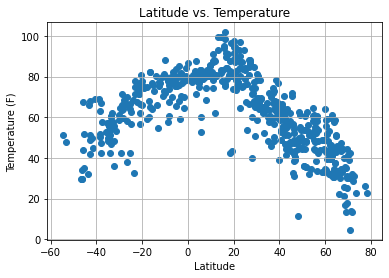

In [9]:
#Plot latitude vs temperature and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature'])
plt.title(f'Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')


In [ ]:
# Relationship between latitude and temperature. As you approach the equator the temperature gets hotter.

## Latitude vs. Humidity Plot

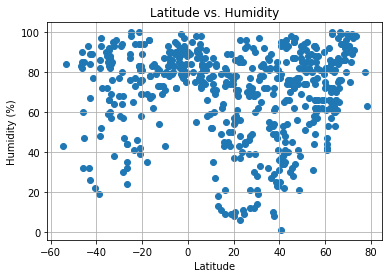

In [10]:
#Plot latitude vs humidity and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'])
plt.title(f'Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_humid.png', bbox_inches='tight')


In [ ]:
#Relationship between latitude and humidity. Lacking correlation.

## Latitude vs. Cloudiness Plot

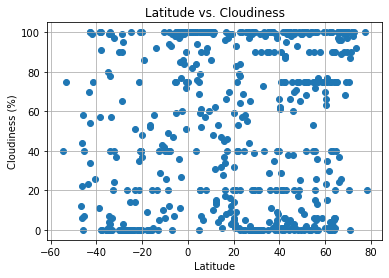

In [11]:
#Plot latitude vs cloudiness and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'])
plt.title(f'Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_cloud.png', bbox_inches='tight')


In [ ]:
# Relationship between latitude and Cloudiness. Lacking correlation.

## Latitude vs. Wind Speed Plot

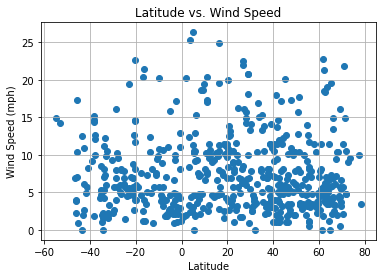

In [12]:
#Plot latitude vs wind speed and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'])
plt.title(f'Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('lat_wind.png', bbox_inches='tight')


In [ ]:
#Relationship between latitude and wind speed. Wind speeds are greater the farther away from the equator.

## Linear Regression

In [24]:
#create northern and southern df
north_df = city_data_df.loc[(city_data_df['Latitude']>0)]
south_df = city_data_df.loc[(city_data_df['Latitude'] < 0)]

In [25]:
def line_regr(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.8409505008175437


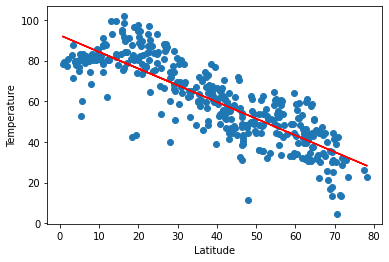

<Figure size 432x288 with 0 Axes>

In [29]:
#Northern Hemisphere - Temperature vs. Latitude
x = north_df['Latitude']
y = north_df['Temperature']
line_regr(x,y,'Temperature')

plt.savefig("NH_temp_vs_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.7624049786967076


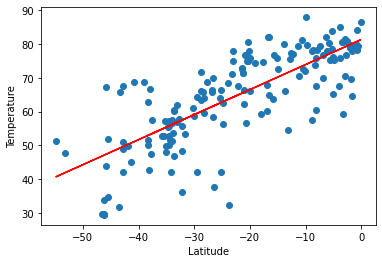

<Figure size 432x288 with 0 Axes>

In [31]:
#Southern Hemisphere - Temperature vs. Latitude
x = south_df['Latitude']
y = south_df['Temperature']
line_regr(x,y,'Temperature')

plt.savefig("SH_temp_vs_lat.png")

In [ ]:
#In the Northern hemisphere, temperatures decrease the further away from the equator. While temperatures increase the closer to the equator in the Southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.17751953899672326


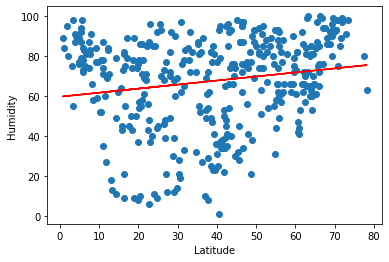

<Figure size 432x288 with 0 Axes>

In [32]:
#Northern Hemisphere - Humidity vs. Latitude 
x = north_df['Latitude']
y = north_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("NH_hum_vs_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.29031911378764336


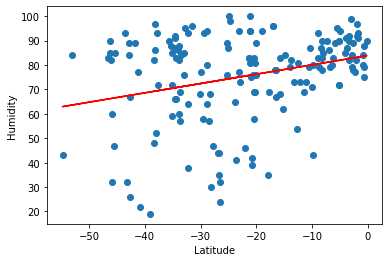

<Figure size 432x288 with 0 Axes>

In [34]:
#Southern Hemisphere - Humidity vs. Latitude 
x = south_df['Latitude']
y = south_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("SH_hum_vs_lat.png")

In [ ]:
#There shows very little correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.05384322876230766


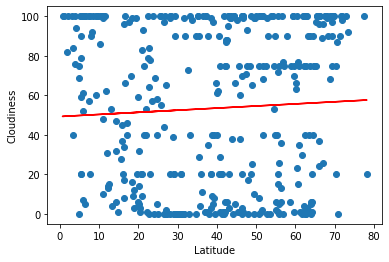

<Figure size 432x288 with 0 Axes>

In [35]:
#Northern Hemisphere - Cloudiness vs. Latitude 
x = north_df['Latitude']
y = north_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("NH_cloud_vs_lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.2572332607817951


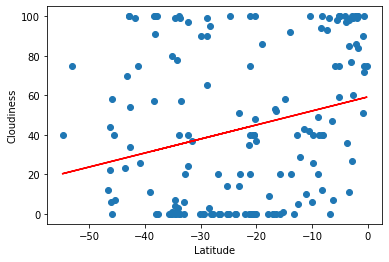

<Figure size 432x288 with 0 Axes>

In [36]:
#Southern Hemisphere - Cloudiness vs. Latitude
x = south_df['Latitude']
y = south_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("SH_cloud_vs_lat.png")

In [ ]:
#There shows very little correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.15072903649724323


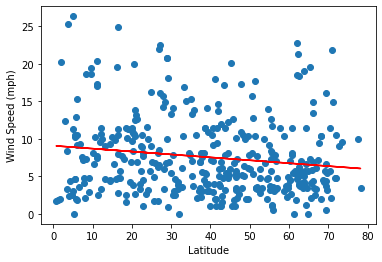

<Figure size 432x288 with 0 Axes>

In [37]:
#Northern Hemisphere - Wind Speed vs. Latitude
x = north_df['Latitude']
y = north_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')

plt.savefig("NH_wind_vs_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.11010086729941153


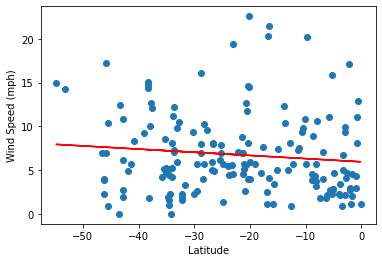

<Figure size 432x288 with 0 Axes>

In [38]:
#Southern Hemisphere - Wind Speed vs. Latitude
x = south_df['Latitude']
y = south_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')

plt.savefig("SH_wind_vs_lat.png")

In [ ]:
#There shows very little correlation.